## MealMatch: An Intelligent Restaurant Suggestion System

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import operator

%matplotlib inline

In [2]:
# Loading the data
df = pd.read_csv('zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
print("Dataset has", df.shape[0], "rows and", df.shape[1], "columns")

Dataset has 51717 rows and 17 columns


### DATA CLEANING & PREPROCESSING

In [4]:
# Drop unnecessary columns
df.drop(['url', 'address', 'phone', 'menu_item'], axis=1, inplace=True)

In [5]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


In [6]:
df.isna().sum() 

name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [7]:
# Handle special values in 'rate' and drop NaN values in key columns
df = df[df['rate'] != 'NEW']
df = df[df['rate'] != '-']
df_rate = df.dropna(subset=['location', 'rate', 'rest_type', 'cuisines', 'approx_cost(for two people)'])
df_rate = df_rate.dropna(axis=1)

In [8]:
# Correct binary encoding
binary_encode_dict = {'Yes': 1, 'No': 0}  # Corrected the encoding
df_rate.replace({'online_order': binary_encode_dict, 'book_table': binary_encode_dict}, inplace=True)

In [9]:
df_rate.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
0,Jalsa,1,1,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,Spice Elephant,1,0,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,San Churro Cafe,1,0,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,Addhuri Udupi Bhojana,0,0,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,Grand Village,0,0,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


In [10]:
# Feature transformation
df_rate['rate'] = df_rate['rate'].apply(lambda x: float(x[:-2].strip()))
df_rate = pd.get_dummies(df_rate, columns=['listed_in(type)'], prefix='Listed')
df_rate = pd.get_dummies(df_rate, columns=['listed_in(city)'], prefix='City')
df_rate['approx_cost(for two people)'] = df_rate['approx_cost(for two people)'].apply(lambda x: int(x.replace(',', '')))


In [11]:
# Feature extraction from 'rest_type'
for i, row in df_rate.iterrows():
    rest_types = [x.strip() for x in row['rest_type'].split(',')]
    for rest_type in rest_types:
        df_rate.loc[i, rest_type] = int(1)

# Feature extraction for 'cuisines' (similar to 'rest_type')
for i, row in df_rate.iterrows():
    cuisines = [x.strip() for x in str(row['cuisines']).split(',')]
    for cuisine in cuisines:
        column_name = "cuisine_" + cuisine
        df_rate.loc[i, column_name] = int(1)


C:\Temp\ipykernel_13304\520046867.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_rate.loc[i, column_name] = int(1)
C:\Temp\ipykernel_13304\520046867.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_rate.loc[i, column_name] = int(1)
C:\Temp\ipykernel_13304\520046867.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame

In [12]:
# Compute popularity score (rate * votes)
df_rate['popularity'] = df_rate['rate'] * df_rate['votes']

# Cleanup
df_rate.fillna(0, inplace=True)
df_rate.drop(['name', 'location', 'rest_type', 'cuisines', 'reviews_list'], axis=1, inplace=True)
df_rate.head()


C:\Temp\ipykernel_13304\1516281422.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_rate['popularity'] = df_rate['rate'] * df_rate['votes']


,online_order,book_table,rate,votes,approx_cost(for two people),Listed_Buffet,Listed_Cafes,Listed_Delivery,Listed_Desserts,Listed_Dine-out,...,cuisine_Paan,cuisine_German,cuisine_Russian,cuisine_Drinks Only,cuisine_Jewish,cuisine_Vegan,cuisine_Pan Asian,cuisine_Raw Meats,cuisine_Sindhi,popularity
0,1,1,4.1,775,800,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3177.5
1,1,0,4.1,787,800,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3226.7
2,1,0,3.8,918,800,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3488.4
3,0,0,3.7,88,300,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,325.6
4,0,0,3.8,166,600,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,630.8


In [13]:
# Normalize (here we just normalize 'rate', 'votes', and 'approx_cost(for two people)')
for col in ['rate', 'votes', 'approx_cost(for two people)']:
    df_rate[col] = (df_rate[col] - df_rate[col].min()) / (df_rate[col].max() - df_rate[col].min())

# Check the final data
print(df_rate.isna().sum())

online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
                              ..
cuisine_Vegan                  0
cuisine_Pan Asian              0
cuisine_Raw Meats              0
cuisine_Sindhi                 0
popularity                     0
Length: 172, dtype: int64


### EDA & VISUALIZATION ALONG WITH ANALYSIS

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


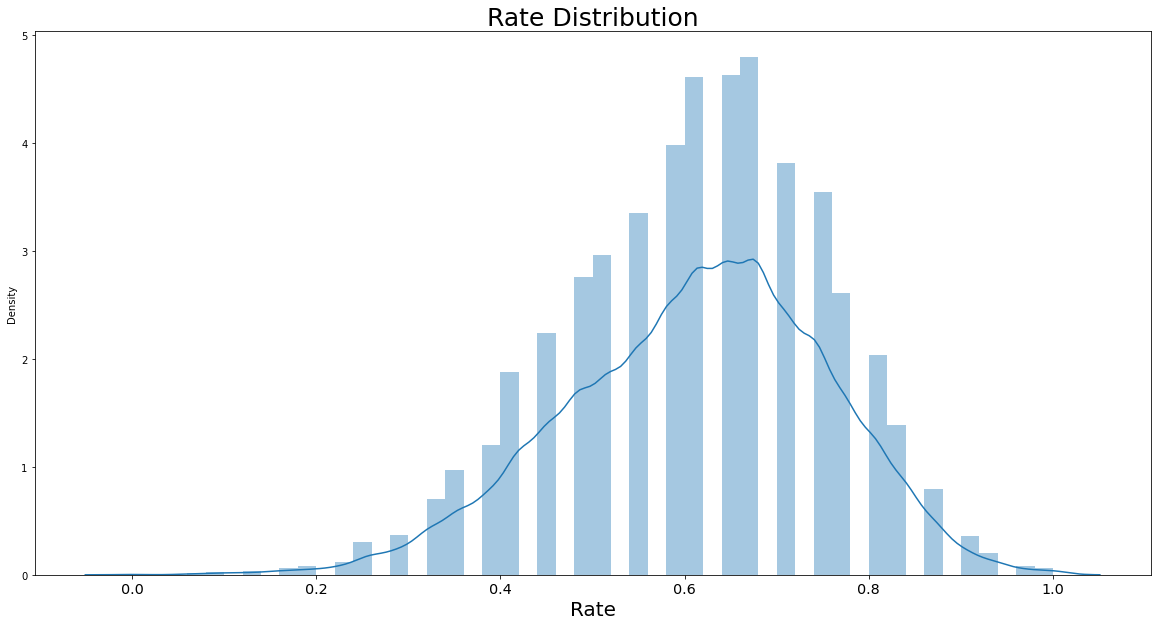

In [14]:
plt.figure(figsize=(20,10))
sns.distplot(df_rate['rate'])
plt.title('Rate Distribution', fontsize=25)
plt.xlabel('Rate', fontsize=20)
plt.xticks(

        fontweight='light',
        fontsize='x-large'  
    )
plt.show()

In [15]:
print('First Quantile of rate distribution is {} '.format(np.quantile(df_rate['rate'], 0.25)))
print('Second Quantile of rate distribution is {} '.format(np.quantile(df_rate['rate'], 0.50)))
print('Third Quantile of rate distribution is {} '.format(np.quantile(df_rate['rate'], 0.75)))
print('Forth Quantile of rate distribution is {} '.format(np.quantile(df_rate['rate'], 1)))
print('Average Rating is {} '.format(df_rate['rate'].mean()))

First Quantile of rate distribution is 0.5161290322580644 
Second Quantile of rate distribution is 0.6129032258064515 
Third Quantile of rate distribution is 0.7096774193548386 
Forth Quantile of rate distribution is 1.0 
Average Rating is 0.6135520926737806 


As clearly prevalant in the graph and stats above, there's a bell shaped curve as far as ratings are concerned. 
Average rating being 3.702 and very less restaurants have rating as 5 or close to 5.

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


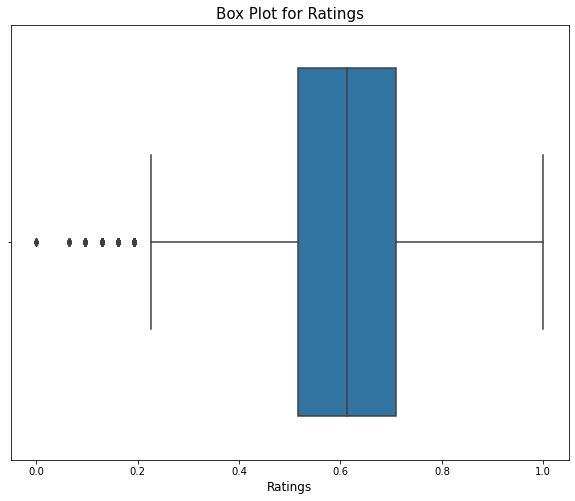

In [16]:
plt.figure(figsize=(10, 8))
sns.boxplot(df_rate['rate'])
plt.title('Box Plot for Ratings', fontsize=15)
plt.xlabel('Ratings', fontsize=12)
plt.show()


In [17]:
corr = df_rate.corr()
corr_clean = corr[['rate']]
corr_clean

,rate
online_order,0.068970
book_table,0.426070
rate,1.000000
votes,0.435256
approx_cost(for two people),0.385384
...,...
cuisine_Vegan,0.016390
cuisine_Pan Asian,-0.007855
cuisine_Raw Meats,-0.000045
cuisine_Sindhi,0.011144


The above stats represent the correlation of features with rating. If the correlation tending closer towards 1 means that the rating is highly dependent on that feature. And a correlation in negative indirectly or directly means that there's no correlation between those 2 features.

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


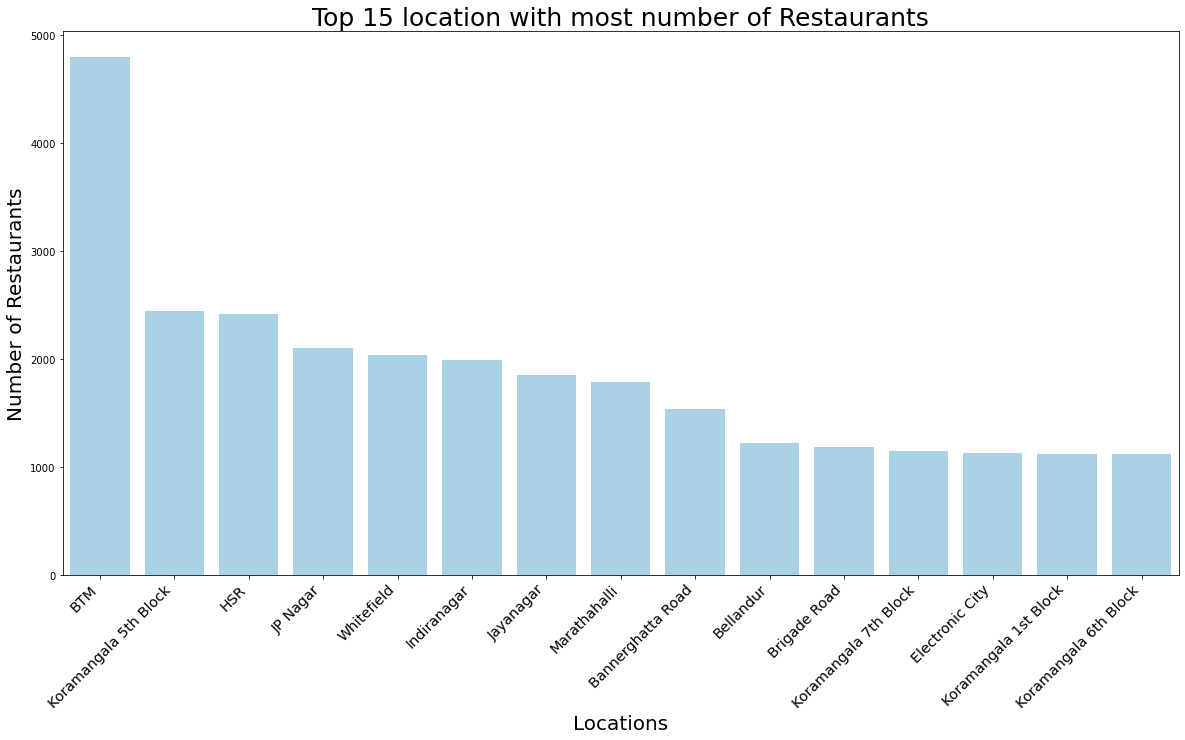

In [18]:
def plot_location_graph(data, title):
    loc_count = data
    plt.figure(figsize=(20,10))
    sns.barplot(loc_count.index, loc_count.values, alpha=0.8, color = 'skyblue')
    plt.title(title, fontsize=25)
    plt.ylabel('Number of Restaurants', fontsize=20)
    plt.xlabel('Locations', fontsize=20)
    plt.xticks(
        rotation=45, 
        horizontalalignment='right',
        fontweight='light',
        fontsize='x-large'  
    )
    plt.show()

plot_location_graph(df['location'].value_counts()[:15,], 'Top 15 location with most number of Restaurants')

Above graph shows location and the number of restaurants they have. According to stats, BTM has the highest number of Restaurants, Koramangala has been divided into blocks and still stands slighly close to HSR.  

In [19]:
def dish_liked_counter(df):
    
    dish_liked_dict = {}
    dishes = df['dish_liked'].dropna()

    for dish in dishes:
        dish_list = [x.strip() for x in dish.split(',')]
        for dish_item in dish_list:
            if dish_item in dish_liked_dict.keys():
                dish_liked_dict[dish_item] +=1
            else:
                dish_liked_dict[dish_item] = 1
    return dish_liked_dict


def plot_top_dishes(dish_liked_dict):
    sorted_dish = sorted(dish_liked_dict.items(), key=operator.itemgetter(1), reverse=True)
    x = [x[0] for x in sorted_dish[:20]]
    y = [y[1] for y in sorted_dish[:20]]
    
    plt.figure(figsize=(20,10))
    sns.barplot(x, y, alpha=0.8, color = 'skyblue')
    plt.title('Top 20 most liked dishes', fontsize=25)
    plt.ylabel('Number of Restaurants', fontsize=20)
    plt.xlabel('Dishes', fontsize=20)
    plt.xticks(
        rotation=45, 
        horizontalalignment='right',
        fontweight='light',
        fontsize='x-large'  
    )
    plt.show()

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


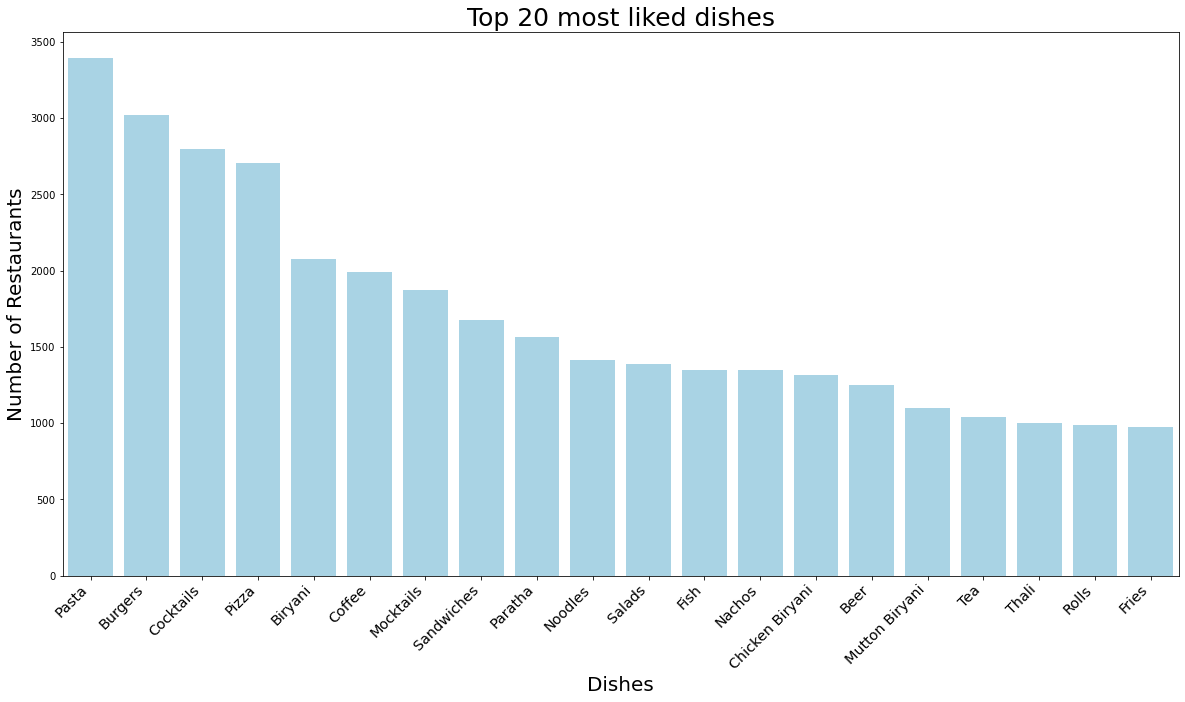

In [20]:
dish_liked_dict = dish_liked_counter(df)
plot_top_dishes(dish_liked_dict)

Pasta & Burgers were the most liked dishes around 3.4K restaurants have bad Pasta and Fries stands at 20th position.

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


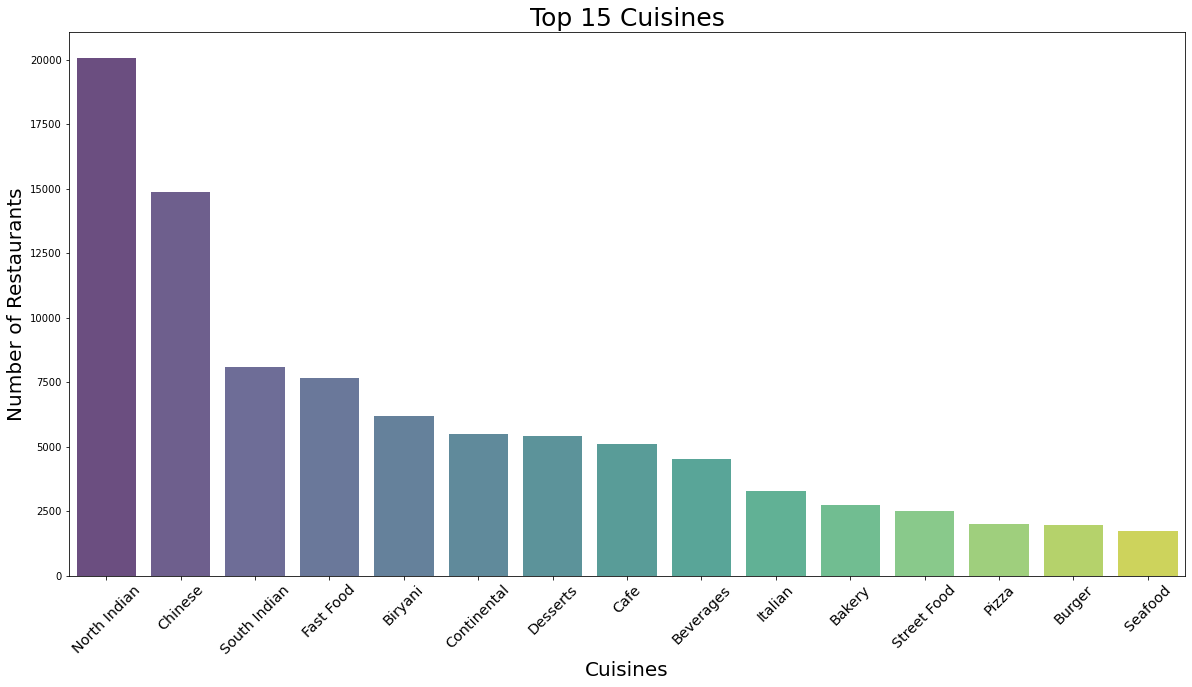

In [21]:
def cuisine_counter(df):
    cuisine_dict = {}
    for cuisine_list in df['cuisines'].dropna():
        for cuisine in cuisine_list.split(','):
            cuisine = cuisine.strip()
            cuisine_dict[cuisine] = cuisine_dict.get(cuisine, 0) + 1
    return cuisine_dict

cuisine_dict = cuisine_counter(df)
top_cuisines = sorted(cuisine_dict.items(), key=operator.itemgetter(1), reverse=True)[:15]

cuisine_names = [item[0] for item in top_cuisines]
cuisine_counts = [item[1] for item in top_cuisines]

plt.figure(figsize=(20,10))
sns.barplot(cuisine_names, cuisine_counts, alpha=0.8, palette='viridis')
plt.title('Top 15 Cuisines', fontsize=25)
plt.ylabel('Number of Restaurants', fontsize=20)
plt.xlabel('Cuisines', fontsize=20)
plt.xticks(rotation=45, fontweight='light', fontsize='x-large')
plt.show()


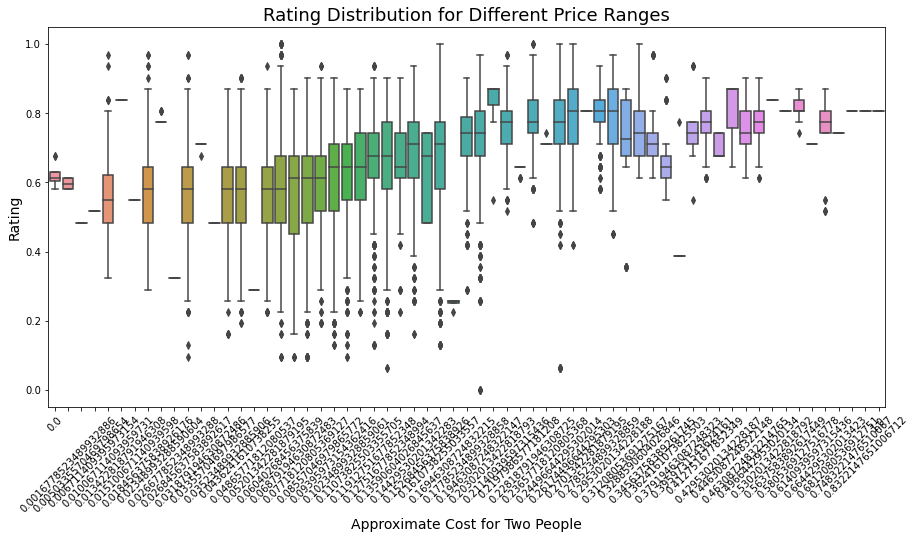

In [22]:
plt.figure(figsize=(15, 7))
sns.boxplot(x='approx_cost(for two people)', y='rate', data=df_rate)
plt.title('Rating Distribution for Different Price Ranges', fontsize=18)
plt.xlabel('Approximate Cost for Two People', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.xticks(rotation=45)
plt.show()


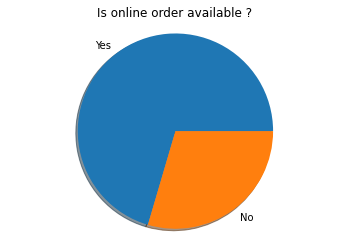

In [52]:
online_order = df['online_order'].value_counts()
plt.pie(online_order.values, labels=online_order.index,shadow=True)
plt.title('Is online order available ?')
plt.axis('equal')
plt.show()

More than 50% of the restaurants allow customers to order food online

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [24]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


In [25]:
zomato=df
zomato.duplicated().sum()
zomato.drop_duplicates(inplace=True)
zomato.isnull().sum()
zomato.dropna(how='any',inplace=True)
zomato.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23247 entries, 0 to 51715
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         23247 non-null  object
 1   online_order                 23247 non-null  object
 2   book_table                   23247 non-null  object
 3   rate                         23247 non-null  object
 4   votes                        23247 non-null  int64 
 5   location                     23247 non-null  object
 6   rest_type                    23247 non-null  object
 7   dish_liked                   23247 non-null  object
 8   cuisines                     23247 non-null  object
 9   approx_cost(for two people)  23247 non-null  object
 10  reviews_list                 23247 non-null  object
 11  listed_in(type)              23247 non-null  object
 12  listed_in(city)              23247 non-null  object
dtypes: int64(1), object(12)
memory 

In [26]:
zomato = zomato.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type',
                                  'listed_in(city)':'city'})
zomato.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'cost', 'reviews_list', 'type',
       'city'],
      dtype='object')

In [27]:
zomato['cost'] = zomato['cost'].astype(str)  # Changing the cost to string
zomato['cost'] = zomato['cost'].apply(lambda x: x.replace(',', ''))  # Using lambda function to replace ',' from cost


zomato['cost'] = zomato['cost'].astype(float)  # Changing the cost to Float

In [28]:
zomato = zomato.loc[zomato.rate != 'NEW']
zomato = zomato.loc[zomato.rate != '-'].reset_index(drop=True)
remove_slash = lambda x: x.replace('/5', '') if isinstance(x, str) else x  # Use isinstance to check for string type
zomato['rate'] = zomato['rate'].apply(remove_slash).astype(str)
zomato['rate'] = zomato['rate'].str.strip().astype('float')

In [29]:
# Adjust the column names
zomato.name = zomato.name.apply(lambda x:x.title())
zomato.online_order.replace(('Yes','No'),(True, False),inplace=True)
zomato.book_table.replace(('Yes','No'),(True, False),inplace=True)
zomato.cost.unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        750.,  200.,  850., 1200.,  150.,  350.,  250., 1500., 1300.,
       1000.,  100.,  900., 1100., 1600.,  950.,  230., 1700., 1350.,
       2200., 1400., 2000., 1800., 1900.,  180.,  330., 2500., 2100.,
       3000., 2800., 3400.,   40., 1250., 3500., 4000., 2400., 1450.,
       3200., 6000., 1050., 4100., 2300.,  120., 2600., 5000., 3700.,
       1650., 2700., 4500.])

In [30]:
zomato['city'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

In [31]:
## Computing Mean Rating
restaurants = list(zomato['name'].unique())
zomato['Mean Rating'] = 0

for i in range(len(restaurants)):
    zomato.loc[zomato['name'] == restaurants[i], 'Mean Rating'] = zomato['rate'][zomato['name'] == restaurants[i]].mean()

zomato.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,type,city,Mean Rating
0,Jalsa,True,True,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari,4.118182
1,Spice Elephant,True,False,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari,4.100000
2,San Churro Cafe,True,False,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari,3.800000
3,Addhuri Udupi Bhojana,False,False,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari,3.700000
4,Grand Village,False,False,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari,3.800000


In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (1,5))
zomato[['Mean Rating']] = scaler.fit_transform(zomato[['Mean Rating']]).round(2)
zomato.sample(3)

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,type,city,Mean Rating
13859,The Local - Terrace Drinkery,False,False,4.0,1408,Koramangala 6th Block,"Pub, Casual Dining","Beer, Burgers, Sandwiches, Virgin Mojito, Beef...","Continental, American, Pizza, BBQ",1000.0,"[('Rated 4.0', 'RATED\n ItÃ\x83Ã\x83Ã\x82Ã...",Dine-out,Koramangala 5th Block,3.84
5520,Coco Grove Beer Cafe,False,False,3.8,152,Church Street,Casual Dining,"Sandwiches, Burgers, Lamb Burger, Chicken Pepp...",Continental,800.0,"[('Rated 4.0', 'RATED\n Decent place to hango...",Dine-out,Church Street,3.58
1977,Dhaba Shaba,True,False,3.2,61,Sarjapur Road,Quick Bites,"Paratha, Rajma Chawal","North Indian, Fast Food",250.0,"[('Rated 4.0', 'RATED\n Ordered from place on...",Dine-out,Bellandur,2.91


In [33]:
zomato[['reviews_list', 'cuisines']].sample(5)

,reviews_list,cuisines
3945,"[('Rated 4.0', 'RATED\n I have ordered a few ...",North Indian
5528,"[('Rated 3.0', ""RATED\n Desi Vdesi, Church St...","Fast Food, North Indian, Rolls"
12699,"[('Rated 3.0', ""RATED\n Decent Dosas. Decent ...","South Indian, North Indian, Chinese, Beverages"
11702,"[('Rated 4.0', ""RATED\n Ordered twice from he...","Kerala, Seafood, South Indian, Chinese, North ..."
7069,"[('Rated 5.0', 'RATED\n It was my second visi...","Pizza, Fast Food, BBQ"


In [34]:
zomato["reviews_list"] = zomato["reviews_list"].str.lower()
zomato[['reviews_list', 'cuisines']].sample(5)

,reviews_list,cuisines
17721,"[('rated 5.0', 'rated\n of all the places i h...","Goan, Mangalorean, Pizza"
13481,"[('rated 1.0', 'rated\n ordered food a week a...","Thai, Chinese"
9167,"[('rated 3.0', 'rated\n must try: panner mutt...","North Indian, Afghan"
17029,"[('rated 4.0', 'rated\n got the nutella panca...","Desserts, Ice Cream"
4753,"[('rated 4.0', 'rated\n pretty nice place for...","American, Continental, Finger Food"


In [35]:
import string
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

zomato["reviews_list"] = zomato["reviews_list"].apply(lambda text: remove_punctuation(text))
zomato[['reviews_list', 'cuisines']].sample(5)


,reviews_list,cuisines
6323,rated 20 ratedn loved the ambience liked the ...,"Cafe, Continental"
1595,rated 40 ratedn a decent food had masala dosa...,"South Indian, North Indian, Chinese"
20434,rated 10 ratedn this place is bad very bad i ...,"Cafe, Italian, Continental, Beverages"
15193,rated 40 ratedn ive ordered twice from this p...,"Arabian, Kerala, North Indian, Chinese, BBQ"
20316,rated 50 ratedn salt mango tree is easily one...,Kerala


In [36]:
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

zomato["reviews_list"] = zomato["reviews_list"].apply(lambda text: remove_stopwords(text))


In [37]:
restaurant_names = list(zomato['name'].unique())
restaurant_names




['Jalsa',
 'Spice Elephant',
 'San Churro Cafe',
 'Addhuri Udupi Bhojana',
 'Grand Village',
 'Timepass Dinner',
 'Onesta',
 'Penthouse Cafe',
 'Smacznego',
 'Cafã\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â© Down The Alley',
 'Cafe Shuffle',
 'The Coffee Shack',
 'Caf-Eleven',
 'Cafe Vivacity',
 'Catch-Up-Ino',
 "Kirthi'S Biryani",
 'T3H Cafe',
 'The Vintage Cafe',
 'Woodee Pizza',
 'My Tea House',
 "Srinathji'S Cafe",
 'Redberrys',
 'Foodiction',
 'Ovenstory Pizza',
 'Faasos',
 'Behrouz Biryani',
 'Szechuan Dragon',
 'Empire Restaurant',
 'Chaatimes',
 "Mcdonald'S",
 "Domino'S Pizza",
 'Hotboxit',
 'Kitchen Garden',
 'Recipe',
 'Beijing Bites',
 'Tasty Bytes',
 'Corner House Ice Cream',
 'Biryanis And More',
 'Roving Feast',
 'Freshmenu',
 'Wamama',
 'Peppy Peppers',
 'Goa 0 Km',
 '1947',
 'Kabab Magic',
 'Gustoes Beer House',
 'The Biryani Cafe',
 'Rolls On Wheels',
 'Sri Guru Kottureshwara Davangere Benne Dosa',
 'Upahar Sagar',
 'Frozen Bottle',
 'Me

In [38]:
# No of Unique Restaurants in the Zomato Dataset
x=len(restaurant_names)
print(x) 

3150


In [39]:
import regex as re
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

zomato["reviews_list"] = zomato["reviews_list"].apply(lambda text: remove_urls(text))


zomato[['reviews_list', 'cuisines']].sample(5)


,reviews_list,cuisines
21502,rated 50 ratedn far one best place arabian med...,"Mediterranean, Arabian, Lebanese"
11303,rated 50 ratedn know owners sweetest people li...,Bakery
23037,rated 30 ratedn decent place looking cheap sta...,"Steak, Continental, American, Italian, Salad, ..."
5637,rated 30 ratedn good bad average ordered coupl...,"North Indian, Mughlai, Afghan"
4000,rated 40 ratedn came back home firstly little ...,"Cafe, Desserts"


In [40]:
zomato=zomato.drop(['rest_type', 'type', 'votes'],axis=1)

### CONTENT BASED RECOMMENDATION

In [41]:
#CONTENT BASED RECOMMENDATION
import pandas
# Randomly sample 60% of your dataframe
df_percent = zomato.sample(frac=0.5)
df_percent.set_index('name', inplace=True)
indices = pd.Series(df_percent.index)
tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=0, stop_words='english')
tfidf_matrix = tfidf.fit_transform(df_percent['reviews_list'])
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)

In [42]:
def recommend(name, cosine_similarities = cosine_similarities):
    
    # Create a list to put top restaurants
    recommend_restaurant = []
    idx = indices[indices == name].index[0]
    
    # Finding the restaurants with a similar cosine-sim value and order them from bigges number
    score_series = pd.Series(cosine_similarities[idx]).sort_values(ascending=False)
    top30_indexes = list(score_series.iloc[0:31].index) #top 30 restaurant
    for each in top30_indexes:
        recommend_restaurant.append(list(df_percent.index)[each])
    
    # Creating the new data set to show similar restaurants
    df_new = pd.DataFrame(columns=['cuisines', 'Mean Rating', 'cost'])
    for each in recommend_restaurant:
        df_new = df_new.append(pd.DataFrame(df_percent[['cuisines','Mean Rating', 'cost']][df_percent.index == each].sample()))
    
    # Drop the same named restaurants and sort only the top 10 by the highest rating
    df_new = df_new.drop_duplicates(subset=['cuisines','Mean Rating', 'cost'], keep=False)
    df_new = df_new.sort_values(by='Mean Rating', ascending=False).head(10)
    
    print('TOP %s RESTAURANTS LIKE %s WITH SIMILAR REVIEWS: ' % (str(len(df_new)), name))
    
    return df_new

In [43]:
import warnings
warnings.filterwarnings('ignore')

recommend("Pizza Hut")

TOP 5 RESTAURANTS LIKE Pizza Hut WITH SIMILAR REVIEWS: 


,cuisines,Mean Rating,cost
Whooppeezz,"Italian, Pizza",3.84,500.0
Ovenstory Pizza,Pizza,3.78,750.0
Pizza Stop,"Pizza, Italian",3.34,500.0
Deshi Fusion Pizza,"Pizza, Chinese, Rolls",2.94,750.0
Sbarro,Pizza,2.42,500.0


### COLLABORATIVE FILTERING

In [44]:
from collections import defaultdict
from scipy.sparse import csr_matrix
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import re

In [45]:
# Collaborative filtering
df_collab = zomato[['name', 'rate']].dropna()
#creating pivot table
pivot_table= df_collab.pivot_table(columns=['name'], values='rate')
#normalizing
normalised_pivot_table = pivot_table.apply(lambda x: (x-np.mean(x))/(np.max(x)-np.min(x)), axis=1)
# Drop all columns containing only zeros representing users who did not rate
normalised_pivot_table.fillna(0, inplace=True)
normalised_pivot_table = normalised_pivot_table.T
normalised_pivot_table = normalised_pivot_table.loc[:, (normalised_pivot_table != 0).any(axis=0)]
#converting pivot table into sparse matrix
sparse_matrix = csr_matrix(normalised_pivot_table.values)
#getting item_similaroty anf user similarity
item_similarity = cosine_similarity(sparse_matrix)
user_similarity = cosine_similarity(sparse_matrix.T)

#make item and user similarity matrices into df
item_sim_df = pd.DataFrame(item_similarity, index = normalised_pivot_table.index, columns = normalised_pivot_table.index)
user_sim_df = pd.DataFrame(user_similarity, index = normalised_pivot_table.columns, columns = normalised_pivot_table.columns)

In [46]:
def collaborative_filtering_recommendation(restaurant_name,top_n):
    count = 1
    print('Similar restaurants to {} include:\n'.format(restaurant_name))
    for item in item_sim_df.sort_values(by = restaurant_name, ascending = False).index[1:top_n+1]:
        print('No. {}: {}'.format(count, item))
        count +=1  

In [47]:
collaborative_filtering_recommendation("Burger King",5)
collaborative_filtering_recommendation("Subway", 5)

Similar restaurants to Burger King include:

No. 1: Namdhari'S Salad Bar
No. 2: Myu Bar At Gilly'S Redefined
No. 3: Naachiyar'S
No. 4: Naati Manae
No. 5: Nagarjuna
Similar restaurants to Subway include:

No. 1: Hotel Emirates
No. 2: Hotel Manu
No. 3: Siddharth Restaurant
No. 4: Hotel Little Imperial
No. 5: Hotel Karavali


### EVALUATION METRIC

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
def preprocess_df_rate(df_rate):
    df_rate['rate'] = df_rate['rate'].apply(lambda x: float(x[:-2].strip()))
    df_rate['approx_cost(for two people)'] = df_rate['approx_cost(for two people)'].apply(lambda x: int(x.replace(',', '')))
    df_rate = pd.get_dummies(df_rate, columns=['listed_in(type)', 'listed_in(city)'], prefix=['Listed', 'City'])

    for i, row in df_rate.iterrows():
        rest_types = [x.strip() for x in row['rest_type'].split(',')]
        for rest_type in rest_types:
            df_rate.at[i, rest_type] = 1
    
    df_rate.drop(['rest_type', 'reviews_list'], axis=1, inplace=True)
    return df_rate.fillna(0)

df_rate = preprocess_df_rate(df.copy())
X = df_rate.drop('rate', axis=1)
y = df_rate['rate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Baseline prediction using the mean of the training set
y_pred = np.full(y_test.shape[0], y_train.mean())

print('Mean Squared Error (MSE):', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Mean Absolute Error (MAE):', mean_absolute_error(y_test, y_pred))


Mean Squared Error (MSE): 0.17620249107226787
Root Mean Squared Error (RMSE): 0.41976480447063197
Mean Absolute Error (MAE): 0.29919259610030674


### KNOWLEDGE BASED RECOMMENDER SYSTEM

In [49]:
def recommend_restaurants(location, cuisine, budget, buffer=0.1):
    # Calculate the buffer for budget flexibility
    min_budget = budget * (1 - buffer)
    max_budget = budget * (1 + buffer)
    
    # Filter the dataset based on user preferences
    filtered_df = df_rate[
        (df_rate['approx_cost(for two people)'] >= min_budget) &
        (df_rate['approx_cost(for two people)'] <= max_budget) &
        (df_rate['location'] == location) &
        (df_rate['cuisines'].str.contains(cuisine))
    ]
    
    # Sort and remove duplicates
    sorted_df = filtered_df.sort_values(by='rate', ascending=False)
    sorted_df.drop_duplicates(subset='name', keep='first', inplace=True)
    
    # Return the top recommendations
    return sorted_df.head(10)['name'].tolist()

In [51]:
location = input("ENTER YOUR LOCATION: ")
cuisine = input("ENTER YOUR CUISINE PREFERENCE: ")
budget = int(input("ENTER YOUR BUDGET RANGE (FOR TWO PEOPLE): "))

recommendations = recommend_restaurants(location, cuisine, budget)

if recommendations:
    print("HERE ARE THE TOP RECOMMENDED RESTAURANTS:")
    for i, restaurant in enumerate(recommendations, 1):
        print(f"{i}. {restaurant}")
else:
    print("No matching restaurants found. Please adjust your preferences and try again.")

ENTER YOUR LOCATION: HSR
ENTER YOUR CUISINE PREFERENCE: Burger
ENTER YOUR BUDGET RANGE (FOR TWO PEOPLE): 500
HERE ARE THE TOP RECOMMENDED RESTAURANTS:
1. McDonald's
